In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.DataFrame({"area" : [2600,3000,3200,3600,4000],
                  "price":[550000,565000,610000,680000,725000]})
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


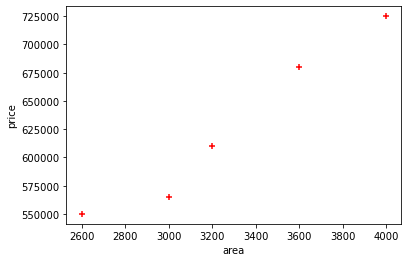

In [2]:
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df["area"],df["price"], color="r", marker ="+")

In [3]:
new_df = df.drop("price", axis ="columns")
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [4]:
price = df["price"]
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

### Create Linear Regression Object

In [5]:
reg = linear_model.LinearRegression()
reg.fit(new_df, price)

LinearRegression()

In [6]:
#Predict price o a home with area = 3300 sqr ft
reg.predict([[3300]])

array([628715.75342466])

### Y = m *x + b ( m is coefficient and b is intercept

In [7]:
reg.coef_   #m coefficient

array([135.78767123])

In [40]:
reg.intercept_    #b intercept

180616.43835616432

In [41]:
print(3300*reg.coef_ + reg.intercept_) # y = mx+b

[628715.75342466]


In [42]:
#Predict price of a home with area = 5000 sqr feet
reg.predict([[5000]])

array([859554.79452055])

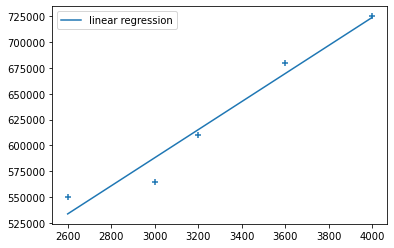

In [68]:
plt.scatter(new_df,price, marker="+")
x = np.linspace(np.min(new_df),np.max(new_df),100)
plt.plot(x, x*reg.coef_ + reg.intercept_, label="linear regression")
plt.legend()
plt.show()

### Generate CSV File with list of home price predictions

In [12]:
area_df = pd.DataFrame({"area": [1000,1500,2300,3540,4120,4560,5490,
                        3460,4750,2300,9000,8600,7100]})
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [13]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [14]:
area_df["prices"] = p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [60]:
#Writing the csv file
#area_df.to_csv("prediction.csv")

### Linear Regression with multiple variables
     y = m1*x1 + m2*x2 + m3*x3 + b

In [16]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
df = pd.DataFrame({"area": [2600,3000,3200,3600,4000,4100],
                  "bedrooms": [3,4,np.nan,3,5,6],
                  "age": [20,15,18,30,8,8],
                  "price": [550000,565000,610000,595000,760000,810000]})
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [17]:
#Data preprocessing
df.bedrooms.median()

4.0

In [18]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [21]:
#Regression model
reg = linear_model.LinearRegression()
reg.fit(df.drop("price", axis="columns"),df.price)

LinearRegression()

In [5]:
m1,m2,m3 = reg.coef_
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [6]:
b = reg.intercept_

### Prediction
Prediction of price of the home with area 3000, 3 bedrooms, and 40 years old

In [7]:
reg.predict([[3000,3,40]])

array([498408.25158031])

In [8]:
a1,a2,a3 = [3000,3,40]   #wanted
price_wanted = a1*m1 + a2*m2 + a3*m3 + b
price_wanted

498408.25158030697

###  Exercise
Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

In [10]:
#from word2number import w2n
df2 = pd.DataFrame({"experience": [np.nan, np.nan,"five","two","seven","three","ten","eleven"],
                   "test_score": [8,8,6,10,9,7,np.nan,7],
                   "interview_score": [9,6,7,10,6,10,7,8],
                   "salary":[50000,45000,60000,65000,70000,62000,72000,80000]})
df2

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [11]:
df2.experience = [np.nan,np.nan,5,2,7,3,10,11]

In [12]:
#df2.experience = df2.experience.apply(w2n.word_to_num)

In [14]:
df2.experience = df2.experience.fillna(0)
df2.test_score = df2.test_score.fillna(df2.test_score.mean())
df2

,experience,test_score,interview_score,salary
0,0.0,8.000000,9,50000
1,0.0,8.000000,6,45000
2,5.0,6.000000,7,60000
3,2.0,10.000000,10,65000
4,7.0,9.000000,6,70000
5,3.0,7.000000,10,62000
6,10.0,7.857143,7,72000
7,11.0,7.000000,8,80000


In [15]:
#Regression model
reg2 = linear_model.LinearRegression()
reg2.fit(df2.drop("salary",axis="columns"), df2.salary)

LinearRegression()

In [16]:
reg2.predict([[2,9,6]]) , reg2.predict([[12,10,10]])

(array([53290.89255945]), array([92268.07227784]))

In [17]:
reg3 = linear_model.LinearRegression()
reg3.fit(df2[["experience","test_score","interview_score"]], df2.salary)

LinearRegression()

In [18]:
reg3.predict([[2,9,6]]), reg3.predict([[12,10,10]])

(array([53290.89255945]), array([92268.07227784]))

In [19]:
def err(d1,d2):
    error = abs(d1-d2)/d1
    return error*100
err(reg3.predict([[2,9,6]]),reg2.predict([[2,9,6]])) , err(reg3.predict([[12,10,10]]),reg3.predict([[12,10,10]]))

(array([0.]), array([0.]))